In [1]:
# -*- coding: utf-8 -*-
"""
==============================================================================
@author: Nikolaos Giakoumoglou
@date: Thu May  6 19:10:11 2021
@reference: Weszka, A Comparative Study of Texture Measures for Terrain Classification
==============================================================================
"""

import numpy as np


def glds(f, mask, dx, dy, Ng):
    '''
    Parameters
    ----------
    f : numpy ndarray
        Image of dimensions N1 x N2.
    mask : numpy ndarray
        Mask image N1 x N2 with 1 if pixels belongs to ROI, 0 else
    dx : int
        Orientation in X-coordinate
    dy : int
        Orientation in Y-coordinate
    Ng : int
        Image number of gray values

    Returns
    -------
    f_d : numpy ndarray
    p_d : numpy ndarray
    '''

    N1, N2 = f.shape

    # Calculate f_d(x,y). If calculation includes pixel outside mask, ignore it.
    f_d = np.zeros((N1, N2), np.double)
    for x in range(N1):
        for y in range(N2):
            if (x+dx < N1) & (y+dy < N2) & (x+dx >= 0) & (y+dy >= 0) & (mask[x, y] == 1):
                f_d[x, y] = abs(f[x, y] - f[x+dx, y+dy])

    # Calculate pd_(i)
    f_d_ravel = f_d.ravel()
    mask_ravel = mask.ravel()
    roi = f_d_ravel[mask_ravel.astype(bool)]
    p_d = np.histogram(roi, bins=Ng, range=(0, Ng-1)
                       )[0]  # histogram of f_d in ROI

    return f_d, p_d


def glds_features(f, mask, Dx=[0, 1, 1, 1], Dy=[1, 1, 0, -1]):
    '''
    Parameters
    ----------
    f : numpy ndarray
        Image of dimensions N1 x N2.
    mask : numpy ndarray
        Mask image N1 x N2 with 1 if pixels belongs to ROI, 0 else.
    Dx : int, optional
        Array with X-coordinates of vectors denoting orientation. The default
        is [0,1,1,1].
    Dy : int, optional
        Array with Y-coordinates of vectors denoting orientation. The default
        is [1,1,0,-1].

    Returns
    -------
    features : numpy ndarray
        1) Contrast, 2)Angular Second Moment, 3)Entropy, 4)Mean
    labels : list
        Labels of features.
    '''

    if mask is None:
        mask = np.ones(f.shape)

    # 1) Labels
    labels = ["GLDS_Homogeneity", "GLDS_Contrast",
              "GLDS_ASM", "GLDS_Entopy", "GLDS_Mean"]

    # 2) Parameters
    f = f.astype(np.double)
    mask = mask.astype(np.double)
    Dx = np.array(Dx)
    Dy = np.array(Dy)
    Ng = 256

    # 3) Loop over Dx, Dy values to calculate feats
    features = []
    for ii in range(Dx.shape[0]):

        dx = Dx[ii]
        dy = Dy[ii]

        f_d, p_d = glds(f, mask, dx, dy, Ng)

        feats = np.zeros(5, np.double)
        i = np.arange(Ng)
        i2 = i ** 2
        feats[0] = sum(np.divide(p_d, i2+1))
        feats[1] = sum(np.multiply(p_d, i2))
        feats[2] = sum(np.multiply(p_d, p_d))
        feats[3] = -sum(np.multiply(p_d, np.log(p_d+1e-16)))
        feats[4] = sum(np.multiply(p_d, i))
        features.append(feats)

    # 4) Calculate Features: mean of feats
    features = np.array(features)
    features = features.mean(axis=0)

    return features, labels


In [2]:
import numpy as np

features = []

f =np.array([[0,0,1,1],
             [0,0,1,1],
             [0,2,2,2],
             [2,2,3,3]])

mask = None
if mask is None:
    mask = np.ones(f.shape)
m = f.astype(np.double)
Dx=[0,1,1,1]
Dy=[1,1,0,1]
Dx = np.array(Dx)
Dy = np.array(Dy)
Ng = 4

print(f)

for ii in range(Dx.shape[0]):

    dx = Dx[ii]
    dy = Dy[ii]
    print (dx, dy)
    print("=" * 100)

    N1, N2 = f.shape

    # Calculate f_d(x,y). If calculation includes pixel outside mask, ignore it.
    f_d = np.zeros((N1, N2), np.double)
    for x in range(N1):
        for y in range(N2):
            if (x+dx < N1).any() & (y+dy < N2).any() & (x+dx >= 0).any() & (y+dy >= 0).any() & (mask[x, y] == 1):
                a = f[x, y]
                da = f[x+dx, y+dy] 
                f_d[x, y] = abs(a - da)
                print ("a  : "+ str(a))
                print ("da : " + str(da))
                print ("f_d[x, y] = " + str(abs(a - da)))
                print("=" * 25)

    # Calculate pd_(i)
    f_d_ravel = f_d.ravel()
    mask_ravel = mask.ravel()
    roi = f_d_ravel[mask_ravel.astype(bool)]
    p_d = np.histogram(roi, bins=Ng, range=(0, Ng-1)
                       )[0]  # histogram of f_d in ROI
    print(f_d)
    print(f_d_ravel)
    # print("=======================================")
    print(mask_ravel)
    print(roi)
    print(p_d)

    feats = np.zeros(5, np.double)
    i = np.arange(Ng)
    i2 = i ** 2
    feats[0] = sum(np.divide(p_d, i2+1))
    feats[1] = sum(np.multiply(p_d, i2))
    feats[2] = sum(np.multiply(p_d, p_d))
    feats[3] = -sum(np.multiply(p_d, np.log(p_d+1e-16)))
    feats[4] = sum(np.multiply(p_d, i))
    features.append(feats)

    # 4) Calculate Features: mean of feats
features = np.array(features)
    # features = features.mean(axis=0)
# # Calculate pd_(i)
# f_d_ravel = f_d.ravel()
# mask_ravel = mask.ravel()
# roi = f_d_ravel[mask_ravel.astype(bool)]
# p_d = np.histogram(roi, bins=Ng, range=(0, Ng-1)
#                     )[0]  # histogram of f_d in ROI

[[0 0 1 1]
 [0 0 1 1]
 [0 2 2 2]
 [2 2 3 3]]
0 1
a  : 0
da : 0
f_d[x, y] = 0
a  : 0
da : 1
f_d[x, y] = 1
a  : 1
da : 1
f_d[x, y] = 0
a  : 0
da : 0
f_d[x, y] = 0
a  : 0
da : 1
f_d[x, y] = 1
a  : 1
da : 1
f_d[x, y] = 0
a  : 0
da : 2
f_d[x, y] = 2
a  : 2
da : 2
f_d[x, y] = 0
a  : 2
da : 2
f_d[x, y] = 0
a  : 2
da : 2
f_d[x, y] = 0
a  : 2
da : 3
f_d[x, y] = 1
a  : 3
da : 3
f_d[x, y] = 0
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [2. 0. 0. 0.]
 [0. 1. 0. 0.]]
[0. 1. 0. 0. 0. 1. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 0. 0. 0. 1. 0. 0. 2. 0. 0. 0. 0. 1. 0. 0.]
[12  3  1  0]
1 1
a  : 0
da : 0
f_d[x, y] = 0
a  : 0
da : 1
f_d[x, y] = 1
a  : 1
da : 1
f_d[x, y] = 0
a  : 0
da : 2
f_d[x, y] = 2
a  : 0
da : 2
f_d[x, y] = 2
a  : 1
da : 2
f_d[x, y] = 1
a  : 0
da : 2
f_d[x, y] = 2
a  : 2
da : 3
f_d[x, y] = 1
a  : 2
da : 3
f_d[x, y] = 1
[[0. 1. 0. 0.]
 [2. 2. 1. 0.]
 [2. 1. 1. 0.]
 [0. 0. 0. 0.]]
[0. 1. 0. 0. 2. 2. 1. 0. 2. 1. 1. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1

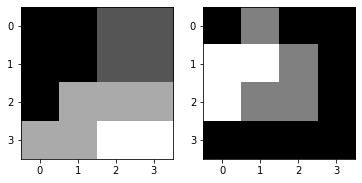

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.add_subplot(1,2, 1)
plt.imshow(f, cmap='gray')
fig.add_subplot(1,2, 2)
plt.imshow(f_d, cmap='gray')
plt.show(block=True)

In [6]:
from _mahotas.features.texture import haralick

haralick(f, compute_14th_feature=True)



array([[0.14583333, 0.        , 0.71953255, 1.03993056, 0.        ,
        0.        , 0.        , 2.45914792, 0.        , 0.06597222,
        1.18872188, 0.        , 0.        , 0.        ],
       [0.11728395, 0.        , 0.1627907 , 1.0617284 , 0.        ,
        0.        , 0.        , 2.05881389, 0.        , 0.02700617,
        1.53049306, 0.        , 0.        , 0.        ],
       [0.13888889, 0.        , 0.48571429, 0.97222222, 0.        ,
        0.        , 0.        , 2.18872188, 0.        , 0.03472222,
        1.45914792, 0.        , 0.        , 0.        ],
       [0.14814815, 0.        , 0.73529412, 0.83950617, 0.        ,
        0.        , 0.        , 2.50325833, 0.        , 0.06404321,
        0.99107606, 0.        , 0.        , 0.        ]])

In [5]:
_2d_deltas = [
    (0, 1),
    (1, 1),
    (1, 0),
    (1, -1)]

a = [0]
def num(dir):
  if a[0]== None: 
    a.append(dir)

def cek():
  
  for dir in range(len(_2d_deltas)):
    a.clear()
    a.append(dir)
  # # return a
    yield _2d_deltas

dir = cek()
# print(a)


for i in dir:
  print(i)
  print(a)
  # print(a)

# next(dir)


[(0, 1), (1, 1), (1, 0), (1, -1)]
[0]
[(0, 1), (1, 1), (1, 0), (1, -1)]
[1]
[(0, 1), (1, 1), (1, 0), (1, -1)]
[2]
[(0, 1), (1, 1), (1, 0), (1, -1)]
[3]
